# Bibliotecas


In [1]:
import pandas as pd
import json
json_normalize = pd.io.json.json_normalize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("data/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico_2019_Febrero.json", "r") as read_file:
    data = json.load(read_file)

In [3]:
# Categoria de delitos
bajoimpacto = ['DELITO DE BAJO IMPACTO', 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
               'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
               'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 
               'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA']
altoimpacto = ['HOMICIDIO DOLOSO','LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
               'ROBO A CASA HABITACIÓN CON VIOLENCIA', 'ROBO A NEGOCIO CON VIOLENCIA',
               'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'SECUESTRO', 'VIOLACIÓN']
# Delitos
alto_impacto = ['FEMINICIDIO','HOMICIDIO POR ARMA BLANCA', 'HOMICIDIO POR ARMA DE FUEGO',
                'HOMICIDIO CULPOSO POR ARMA DE FUEGO','PLAGIO O SECUESTRO','PORNOGRAFIA INFANTIL','VIOLACION',
                'VIOLACION TUMULTUARIA']
bajo_impacto = ['ROBO A CASA HABITACION SIN VIOLENCIA','ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA',
                'ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA','ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA',
                'ROBO DE ACCESORIOS DE AUTO','ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA']

# Limpiar datos

## Dataframe de un solo mes

In [4]:
campos = ['fecha_hechos','fiscalia','agencia','unidad_investigacion','alcaldia_hechos',
          'colonia_hechos','geopoint','categoria_delito','delito']

In [5]:
# Crear una tabla reducida con los campos a trabajar
tabla_list = []
i = 0
for evento in data:
    fila_list = []
    for campo in campos:
        try:
            fila_list.append(evento['fields'][campo])
        except:
            fila_list.append('NA')
            i += 1
    tabla_list.append(fila_list)

# Crear un dataframe
df_crimen = pd.DataFrame(tabla_list,columns=campos)

# Cambiar NA por NaN
# df_crimen.replace('NA',np.nan, inplace=True)

### Ejemplo de limpieza de datos

In [9]:
# Campos con datos invalidos (np.nan)
df_crimen.isnull().sum()

fecha_hechos            0
fiscalia                0
agencia                 0
unidad_investigacion    0
alcaldia_hechos         0
colonia_hechos          0
geopoint                0
categoria_delito        0
delito                  0
dtype: int64

In [10]:
# Campos sin algunos datos (ojo NA no es NaN) hay que aplicar un replace
(df_crimen == 'NA').sum()

fecha_hechos              0
fiscalia                  0
agencia                   0
unidad_investigacion      0
alcaldia_hechos           0
colonia_hechos          668
geopoint                669
categoria_delito          0
delito                    0
dtype: int64

In [11]:
# Cambiar NA por NaN
#df_crimen.replace('NA',np.nan, inplace=True)

# Campos con datos invalidos
df_crimen.isnull().sum()

fecha_hechos              0
fiscalia                  0
agencia                   0
unidad_investigacion      0
alcaldia_hechos           0
colonia_hechos          668
geopoint                669
categoria_delito          0
delito                    0
dtype: int64

### Grafica de Delitos vs. Incidencia

In [8]:
lista_delitos = []
for delito in df_crimen['delito'].unique():
    lista_delitos.append([delito,len(df_crimen[df_crimen['delito'] == delito])])
df_delitos = pd.DataFrame(lista_delitos,columns = ['Delito' , 'Eventos'])

# orden por delito más frecuente
df_delitos.sort_values(by='Eventos',ascending=False,inplace=True)

# rehacer los indices
df_delitos.set_index(np.arange(len(lista_delitos))+1,inplace=True)

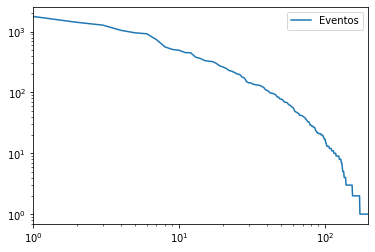

In [9]:
df_delitos.plot(y='Eventos',loglog=True)

In [ ]:
dataframe.drop('nan',axis=1, inplace=True)
mini_df = resea_panda.query(f"LOCATION == '{code}' and INDICATOR == 'GDEXPRD' and MEASURE == 'MLN_USD'")
dataframe.to_csv(f'../data/papers_{journal}.csv')

# Distribution (test)


In [11]:
import scipy.stats as spt
import powerlaw as plw

In [8]:
spt.beta

In [15]:
np.genfromtxt?

In [14]:
plw.Distribution?

In [10]:
import urllib
urllib.request.urlretrieve('https://raw.github.com/jeffalstott/powerlaw/master/manuscript/words.txt', 'words.txt')
words = np.genfromtxt('words.txt')

In [12]:
fit = plw.Fit(words)

Calculating best minimal value for power law fit
/home/corvo/Documentos/ProyectosGit/crimenCDMX/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [14]:
fit.power_law.alpha

2.023004831109283

In [15]:
fit.power_law.fit_method

'Likelihood'

(array([1.2246e+04, 3.6510e+03, 1.8180e+03, 6.9200e+02, 2.4500e+02,
        1.1900e+02, 5.4000e+01, 2.1000e+01, 6.0000e+00, 3.0000e+00]),
 array([0.        , 0.41487877, 0.82975754, 1.24463631, 1.65951507,
        2.07439384, 2.48927261, 2.90415138, 3.31903015, 3.73390892,
        4.14878768]),
 <a list of 10 Patch objects>)

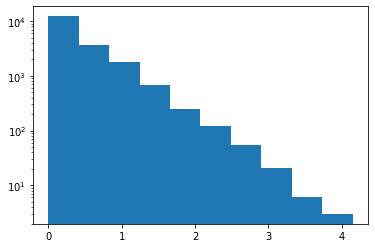

In [20]:
plt.hist(np.log10(words),log=True)

(array([43., 19., 16., 22., 30., 20., 20., 14.,  6.,  6.]),
 array([0.      , 0.325042, 0.650084, 0.975126, 1.300168, 1.62521 ,
        1.950252, 2.275294, 2.600336, 2.925378, 3.25042 ]),
 <a list of 10 Patch objects>)

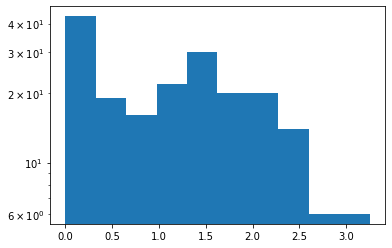

In [24]:
plt.hist(np.log10(df_delitos.Eventos.values),log=True)

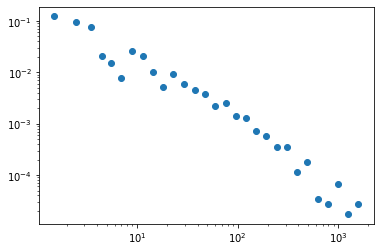

In [30]:
plw.plot_pdf(df_delitos.Eventos.values,marker='o',ls='None',linear_bins=False)

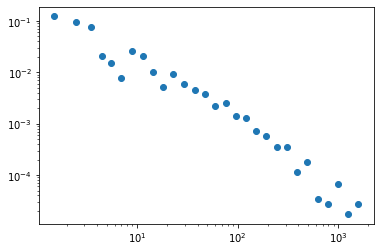

In [30]:
plw.plot_pdf(df_delitos.Eventos.values,marker='o',ls='None',linear_bins=False)

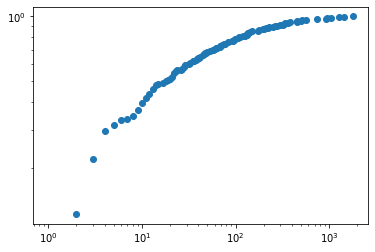

In [32]:
plw.plot_cdf(df_delitos.Eventos.values,marker='o',ls='None')

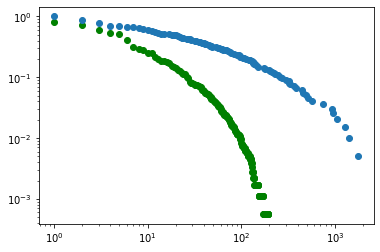

In [38]:
plt.loglog(df_delitos.Eventos.values/1780,'go')
plw.plot_ccdf(df_delitos.Eventos.values,marker='o',ls='None')

#  Zonas (test)

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [7]:
alcaldias = gpd.read_file('data/alcaldias.geojson')
cuadrantes = gpd.read_file('data/cuadrantes.geojson')
colonias = gpd.read_file('data/coloniascdmx.geojson')
coordterrit = gpd.read_file('data/comisiones-vecinales.geojson')

In [18]:
df_crimen.dropna(subset=['geopoint'],inplace=True)

In [23]:
for gpoint in df_crimen.geopoint:
    punto = Point(gpoint[1],gpoint[0])
    if punto.within(alcaldias.geometry[12]):
        pass

## Ejemplo de Datasets

In [24]:
alcaldias

,cvegeo,nomgeo,cve_mun,cve_ent,geometry
0,09012,Tlalpan,012,09,"POLYGON ((-99.19629 19.30228, -99.19595 19.302..."
1,09017,Venustiano Carranza,017,09,"POLYGON ((-99.10895 19.45273, -99.10889 19.452..."
2,09002,Azcapotzalco,002,09,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
3,09007,Iztapalapa,007,09,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
4,09006,Iztacalco,006,09,"POLYGON ((-99.05584 19.42196, -99.05589 19.421..."
5,09016,Miguel Hidalgo,016,09,"POLYGON ((-99.19058 19.46794, -99.19066 19.465..."
6,09008,La Magdalena Contreras,008,09,"POLYGON ((-99.20859 19.33610, -99.20867 19.335..."
7,09003,Coyoacán,003,09,"POLYGON ((-99.13923 19.35687, -99.13772 19.356..."
8,09009,Milpa Alta,009,09,"POLYGON ((-98.99723 19.22731, -98.99745 19.227..."
9,09015,Cuauhtémoc,015,09,"POLYGON ((-99.12919 19.46247, -99.12884 19.462..."


In [23]:
cuadrantes

,sector,cve_zona,zona,no_cuadran,deleg,gid,no_region,y,x,geo_sector,geo_alcald,cve_sector,geometry
0,SAN ANGEL,P,PONIENTE,10,ALVARO OBREGON,2,1,19.314954,-99.216522,63,4,3,"POLYGON ((-99.21377 19.32112, -99.21365 19.317..."
1,TEOTONGO,O,ORIENTE,1,IZTAPALAPA,8,1,19.359487,-99.013033,28,15,8,"POLYGON ((-99.02242 19.36003, -99.02052 19.362..."
2,TLATELOLCO,C,CENTRO,7,CUAUHTEMOC,14,1,19.458025,-99.125421,32,13,8,"POLYGON ((-99.12806 19.45697, -99.12641 19.461..."
3,BUENAVISTA,C,CENTRO,2,CUAUHTEMOC,21,1,19.451680,-99.154812,3,13,4,"POLYGON ((-99.15842 19.45085, -99.15770 19.454..."
4,BUENAVISTA,C,CENTRO,3,CUAUHTEMOC,22,1,19.447905,-99.155544,3,13,4,"POLYGON ((-99.15842 19.45085, -99.15261 19.449..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,DINAMO,S,SUR,5,MAGDALENA CONTRERAS,831,3,19.300258,-99.261265,57,14,1,"POLYGON ((-99.27237 19.30247, -99.27177 19.302..."
843,UNIVERSIDAD,S,SUR,9,COYOACAN,842,2,19.318438,-99.167683,52,7,4,"POLYGON ((-99.17459 19.32260, -99.17405 19.322..."
844,LA NORIA,O,ORIENTE,2,XOCHIMILCO,844,4,19.228383,-99.124672,69,5,1,"POLYGON ((-99.13050 19.20974, -99.13133 19.209..."
845,UNIVERSIDAD,S,SUR,8,COYOACAN,841,2,19.326460,-99.170117,52,7,4,"POLYGON ((-99.17378 19.33269, -99.17276 19.332..."


In [22]:
colonias

,entidad,cve_alc,alcaldia,secc_com,nombre,cve_col,secc_par,geometry
0,9.0,16,MIGUEL HIDALGO,"4971, 4983",LOMAS DE REFORMA,16-043,None,"POLYGON ((-99.23598 19.40510, -99.23546 19.405..."
1,9.0,16,MIGUEL HIDALGO,"4951, 4952, 4953",DANIEL GARZA (AMPL),16-025,"4957, 4959, 4960, 4973, 4990","POLYGON ((-99.19325 19.41382, -99.19312 19.413..."
2,9.0,16,MIGUEL HIDALGO,None,IGNACIO MANUEL ALTAMIRANO,16-034,5110,"POLYGON ((-99.19667 19.46486, -99.19608 19.464..."
3,9.0,16,MIGUEL HIDALGO,5046,LEGARIA,16-036,"5038, 5045, 5058","POLYGON ((-99.19051 19.45879, -99.19065 19.458..."
4,9.0,16,MIGUEL HIDALGO,None,LEGARIA (U HAB),16-037,"5069, 5070","POLYGON ((-99.20242 19.45061, -99.20235 19.450..."
...,...,...,...,...,...,...,...,...
1807,9.0,3,COYOACAN,"419, 420, 421, 422",ADOLFO RUIZ CORTINES II,03-127,423,"POLYGON ((-99.15034 19.32007, -99.15102 19.319..."
1808,9.0,17,VENUSTIANO CARRANZA,"5440, 5441, 5500",EL ARENAL 1A SECCION,17-018,5442,"POLYGON ((-99.05938 19.42333, -99.05905 19.422..."
1809,9.0,17,VENUSTIANO CARRANZA,5357,AERONAUTICA MILITAR,17-003,"5342, 5372","POLYGON ((-99.11620 19.42502, -99.11613 19.425..."
1810,9.0,17,VENUSTIANO CARRANZA,"5492, 5496, 5482",IGNACIO ZARAGOZA II,17-075,"5476, 5477, 5481, 5485","POLYGON ((-99.09353 19.41452, -99.09318 19.414..."


In [21]:
coordterrit

,sector,nombre,zona,region,id,gid,consecut_1,consecutiv,y,x,delegacion,ct,geometry
0,CUJ 1,CUAJIMALPA,PONIENTE,14.0,56.0,47,6.0,1.0,19.342041,-99.313220,CUAJIMALPA,CJ-1,"POLYGON ((-99.28036 19.38140, -99.28049 19.381..."
1,MIL 02,TECOMITL,ORIENTE,11.0,60.0,64,2.0,3.0,19.195221,-99.003643,MILPA ALTA,MIL-2,"POLYGON ((-98.97882 19.21509, -98.97891 19.214..."
2,GAM 2,TICOMAN,NORTE,5.0,50.0,70,4.0,1.0,19.512933,-99.149346,GUSTAVO A MADERO,GAM-2,"POLYGON ((-99.15743 19.53050, -99.15517 19.530..."
3,VCA 1,CONSULADO,NORTE,7.0,66.0,55,5.0,4.0,19.447702,-99.115155,VENUSTIANO CARRANZA,VC-1,"POLYGON ((-99.10908 19.45270, -99.10954 19.451..."
4,IZP 9,QUETZAL,ORIENTE,10.0,22.0,21,2.0,2.0,19.327774,-99.040892,IZTAPALAPA,IZP-9,"POLYGON ((-99.01853 19.33498, -99.01811 19.333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,None,NARVARTE-ALAMOS,SUR,15.0,45.0,38,1.0,1.0,19.389838,-99.149076,BENITO JUAREZ,BJ-3,"POLYGON ((-99.13665 19.40335, -99.13714 19.399..."
67,GAM 8,ARAGON,NORTE,6.0,67.0,56,1.0,2.0,19.459982,-99.088805,GUSTAVO A MADERO,GAM-8,"POLYGON ((-99.05166 19.45225, -99.05159 19.452..."
68,None,CORREDOR-CENTRO,CENTRO,1.0,87.0,69,2.0,1.0,19.432733,-99.132235,CUAUHTEMOC,None,"POLYGON ((-99.12315 19.44263, -99.12331 19.441..."
69,10 UPC,LINDAVISTA,NORTE,5.0,14.0,65,2.0,1.0,19.489249,-99.130519,GUSTAVO A MADERO,GAM-3,"POLYGON ((-99.15689 19.50263, -99.15254 19.500..."


# Gráficas

In [57]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot

In [58]:
from bokeh.models import HoverTool,ColumnDataSource,BoxSelectTool

In [59]:
from bokeh.io import output_file
# from bokeh.io import output_notebook
# output_notebook()

In [66]:
alcaldias = ['ALVARO OBREGON','AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN',
             'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'GUSTAVO A MADERO',
             'IZTACALCO', 'IZTAPALAPA', 'LA MAGDALENA CONTRERAS',
             'MIGUEL HIDALGO', 'MILPA ALTA', 'TLAHUAC', 'TLALPAN',
             'VENUSTIANO CARRANZA', 'XOCHIMILCO']

In [68]:
figure_list = []
for alcaldia in alcaldias:
    lista_delitos = []
    for delito in df_crimen.query(f"alcaldia_hechos == '{alcaldia}'")['delito'].unique():
        lista_delitos.append(
            [delito,len(df_crimen.query(f"alcaldia_hechos == '{alcaldia}' and delito == '{delito}'"))])
    df_delitos = pd.DataFrame(lista_delitos,columns = ['Delito' , 'Eventos'])

    # orden por delito más frecuente
    df_delitos.sort_values(by='Eventos',ascending=False,inplace=True)

    # rehacer los indices
    df_delitos.set_index(np.arange(len(lista_delitos))+1,inplace=True)
    
    # bajo impacto
    bi = df_delitos.loc[df_delitos['Delito'].isin(bajo_impacto)]
    # alto impacto 
    ai = df_delitos.loc[df_delitos['Delito'].isin(alto_impacto)]
    
    src_ai = ColumnDataSource(ai)
    src_bi = ColumnDataSource(bi)
    
    
    tool_list = [HoverTool()]
    # figura
    figure_list.append(figure(x_axis_type='log',y_axis_type='log',
                              x_axis_label='Delitos', y_axis_label='No. Delitos',
                              title=alcaldia,
#                               tools = tool_list,
                              x_range=(0.8, 200), y_range=(0.8, 400),aspect_scale=1,match_aspect=True))
    figure_list[-1].line(df_delitos.index.values,df_delitos.Eventos.values,color='green')
    # figure_list[-1].circle(ai.index.values, ai["Eventos"],color='red', fill_alpha=0.2, size=8)
    # figure_list[-1].circle(bi.index.values, bi["Eventos"],color='blue', fill_alpha=0.2, size=8)
    
    figure_list[-1].circle(x='index',y='Eventos',source=src_ai,color='red', fill_alpha=0.2, size=8)
    figure_list[-1].circle(x='index',y='Eventos',source=src_bi,color='blue', fill_alpha=0.2, size=8)
    
    hover1 = HoverTool(tooltips = [('Delito', '@Delito')])
#     hover2 = HoverTool(tooltips = [('Delito', '@Delito')]
    figure_list[-1].add_tools(hover1)
#     figure_list[-1].add_tools(hover2)

In [69]:
grid = gridplot(figure_list, ncols=4, plot_width=400, plot_height=400)
output_file('delitos.html',title='Delitos Febrero 2019')
show(grid)

In [ ]:
https://docs.bokeh.org/en/latest/docs/gallery/iris_splom.html
https://docs.bokeh.org/en/latest/docs/gallery/iris.html